## Comparing assemblies with QUAST

The assembly algorithms use different heuristic approaches to reconstruct complete chromosomes, correct errors in the reads and try to solve the problem of the repetitive regions of the genome. This is a challenge when using methods that evaluate the quality of an assembly and compare the different assemblies.

[QUAST](https://github.com/ablab/quast) (QUality ASsessment Tool) evaluates and compares genome assemblies and provides various important metrics. It builds comparisons between multiple assemblies of a given genome and can also add the reference genome to the comparison (when available) to extract additional metrics. The QUAST output consists on metrics and graphs that facilitate the interpretation of the assembly results. QUAST also provides metrics to describe structural errors in contigs, reports a list of fully/partially covered genes for each assembly, and presents a series of statistics in a graphic form. However, QUAST does not report scaffolding statistics. The user will need other software to assess this. QUAST also has a [web interface](http://quast.bioinf.spbau.ru/) for comparison of assemblies, with the option to compare against a reference. 

QUAST adds methods and quality metrics to evaluate the assembly from existing software (Plantagora, GAGE, GeneMark.hmm and GlimmerHMM) generating statistics such as the well-known N50 (minimum contig length to cover at least 50% of the genome) and introducing new statistics like the NA50 (is N50 where the length of aligned blocks is counted instead of the contig lengths). To align the assemblies with a reference genome and evaluate the metrics according to the alignments, QUAST uses the Nucmer aligner. 

The common output of an assembly tool, such as Canu or Flye, consists on a directory with intermediate files and a final assembly or contigs files in FASTA format. QUAST command can take several contigs files in FASTA for each assembly that the user wants to include in the comparison. The user can also include the genome reference and specify the name of the directory for the output. Using test assemblies computed in previous notebooks, the following provides an example of using QUAST from NanoDJ.

In [1]:
!quast.py -h

QUAST: Quality Assessment Tool for Genome Assemblies
Version: 5.0.1, 593432e

Usage: python /opt/conda/bin/quast.py [options] <files_with_contigs>

Options:
-o  --output-dir  <dirname>       Directory to store all result files [default: quast_results/results_<datetime>]
-r                <filename>      Reference genome file
-g  --features [type:]<filename>  File with genomic feature coordinates in the reference (GFF, BED, NCBI or TXT)
                                  Optional 'type' can be specified for extracting only a specific feature type from GFF
-m  --min-contig  <int>           Lower threshold for contig length [default: 500]
-t  --threads     <int>           Maximum number of threads [default: 25% of CPUs]

Advanced options:
-s  --split-scaffolds                 Split assemblies by continuous fragments of N's and add such "contigs" to the comparison
-l  --labels "label, label, ..."      Names of assemblies to use in reports, comma-separated. If contain spaces, use quotes
-L  

The next command runs the QUAST analysis using the assemblies generated by Canu and Flye in previous notebooks. The <font color='blue'>-R</font> option specifies the reference genome and the <font color='blue'>-o</font> option is to indicate the output directory name:

In [ ]:
!quast.py data/sample/canu_output/sample.contigs.fasta data/sample/flye_output/scaffolds.fasta \
         -l Canu,Flye \
         -R data/sample/reference/NZ_CP010867.1_Ref.fasta \
         -o data/sample/sample_quast

Once QUAST finishes the execution, the output files are stored under the output directory. Integrated in the notebook, QUAST will also show a summary of the genome statistics for the compared assemblies. However, QUAST will also create an HTML report that contains more details that can be viewed using an internet browser. Data tables and plots are also available in individual files.

In [17]:
!cat data/sample/sample_quast/report.txt

All statistics are based on contigs of size >= 500 bp, unless otherwise noted (e.g., "# contigs (>= 0 bp)" and "Total length (>= 0 bp)" include all contigs).

Assembly                     Canu         Flye       
# contigs (>= 0 bp)          48           21         
# contigs (>= 1000 bp)       39           21         
# contigs (>= 5000 bp)       24           21         
# contigs (>= 10000 bp)      14           21         
# contigs (>= 25000 bp)      5            16         
# contigs (>= 50000 bp)      1            5          
Total length (>= 0 bp)       428398       796700     
Total length (>= 1000 bp)    423607       796700     
Total length (>= 5000 bp)    387929       796700     
Total length (>= 10000 bp)   321740       796700     
Total length (>= 25000 bp)   190487       690632     
Total length (>= 50000 bp)   63190        301257     
# contigs                    45           21         
Largest contig               63190        65748      
Total length                 42

Generated plots are available in the subdirectories under the main output directory. Some of these plots are:

In [18]:
!ls data/sample/sample_quast/basic_stats/ && ls data/sample/sample_quast/aligned_stats/

agalactiae.contigs_GC_content_plot.pdf	cumulative_plot.pdf	  gc.icarus.txt
Canu_GC_content_plot.pdf		Flye_GC_content_plot.pdf  NGx_plot.pdf
contigs_GC_content_plot.pdf		GC_content_plot.pdf	  Nx_plot.pdf
cumulative_plot.pdf  NAx_plot.pdf  NGAx_plot.pdf


The following is a Python code can be used to explore the generated plots listed above directly from the notebook.

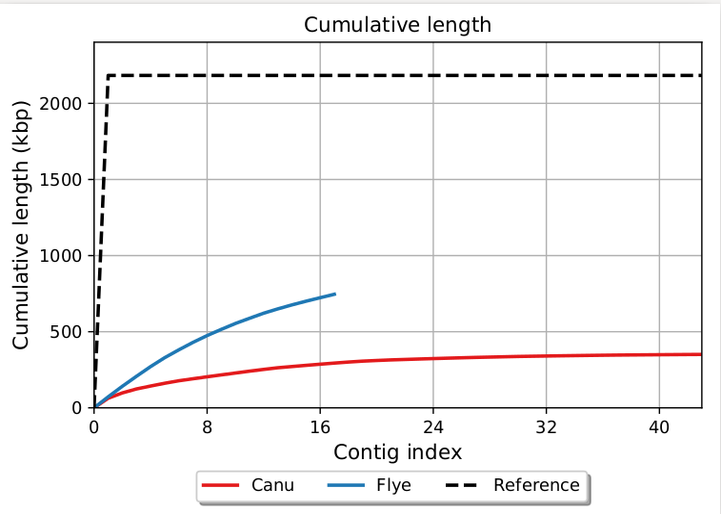

In [3]:
from IPython.display import IFrame
Replace first argument of the IFrame function with the path of any PDF plot
IFrame("data/sample/sample_quast/basic_stats/cumulative_plot.pdf", width=700, height=500)

### Reference

[1] Gurevich A., Saveliev V., Vyahhi N., Tesler G. QUAST: quality assessment tool for genome assemblies, Bioinformatics, Volume 29, Issue 8, 15 April 2013, Pages 1072–1075. DOI: https://doi.org/10.1093/bioinformatics/btt086
